In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

dataset_train = pd.read_csv('../data/microsoft_historical_finance_data_train.csv')
training_set = dataset_train.iloc[:, 1:2].values
#print(training_set)
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
#print(training_set_scaled)
X_train = []
y_train = []

#training data set 10 to 1 scalled 
#print(training_set_scaled[10-10:10, 0])
#print(training_set_scaled[0, 0])

for i in range(14, 252):
    X_train.append(training_set_scaled[i-14:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#print(X_train)
#print(y_train)
display(dataset_train)

,Date,Open,Low,Close,Adj Close,Volume,High
0,3/20/2020,146.000000,135.860001,137.350006,135.968292,84866200,147.100006
1,3/23/2020,137.009995,132.520004,135.979996,134.612076,78975200,140.570007
2,3/24/2020,143.750000,141.270004,148.339996,146.847717,82516700,149.600006
3,3/25/2020,148.910004,144.440002,146.919998,145.442017,75638200,154.330002
4,3/26/2020,148.399994,148.369995,156.110001,154.539566,64568100,156.660004
...,...,...,...,...,...,...,...
247,3/15/2021,234.960007,231.809998,234.809998,234.809998,26034900,235.190002
248,3/16/2021,236.279999,235.940002,237.710007,237.710007,27717700,240.059998
249,3/17/2021,236.149994,233.229996,237.039993,237.039993,29500700,238.550003
250,3/18/2021,232.559998,230.330002,230.720001,230.720001,34833000,234.190002


In [3]:
regressor = Sequential()
#layer 1 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
#Layer 2 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#Layer 3 50 neurons
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#Layer 4 50 neurons
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
#adam optimizer has better results then Adamax, RMSprop
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics = ['MAPE'])
reg = regressor.fit(X_train, y_train, epochs = 150, batch_size = 2)


Epoch 1/150
119/119 [==============================] - 11s 21ms/step - loss: 0.1028 - MAPE: 32.9900
Epoch 2/150
119/119 [==============================] - 3s 24ms/step - loss: 0.0124 - MAPE: 12.7862
Epoch 3/150
119/119 [==============================] - 3s 23ms/step - loss: 0.0092 - MAPE: 11.5698: 0s - loss: 0.0092 - MAPE: 11.5
Epoch 4/150
119/119 [==============================] - 2s 20ms/step - loss: 0.0122 - MAPE: 12.1515
Epoch 5/150
119/119 [==============================] - 2s 20ms/step - loss: 0.0095 - MAPE: 12.4309
Epoch 6/150
119/119 [==============================] - 2s 20ms/step - loss: 0.0101 - MAPE: 11.3685
Epoch 7/150
119/119 [==============================] - 2s 20ms/step - loss: 0.0122 - MAPE: 12.3017
Epoch 8/150
119/119 [==============================] - 2s 19ms/step - loss: 0.0120 - MAPE: 13.9615
Epoch 9/150
119/119 [==============================] - 2s 19ms/step - loss: 0.0090 - MAPE: 11.2267
Epoch 10/150
119/119 [==============================] - 2s 20ms/step - loss:

119/119 [==============================] - 3s 21ms/step - loss: 0.0026 - MAPE: 6.6283
Epoch 82/150
119/119 [==============================] - 3s 21ms/step - loss: 0.0023 - MAPE: 6.4022
Epoch 83/150
119/119 [==============================] - 3s 21ms/step - loss: 0.0022 - MAPE: 5.7407
Epoch 84/150
119/119 [==============================] - 3s 24ms/step - loss: 0.0023 - MAPE: 5.9979
Epoch 85/150
119/119 [==============================] - 3s 23ms/step - loss: 0.0034 - MAPE: 6.8455
Epoch 86/150
119/119 [==============================] - 2s 21ms/step - loss: 0.0022 - MAPE: 5.5813
Epoch 87/150
119/119 [==============================] - 2s 19ms/step - loss: 0.0020 - MAPE: 5.7801
Epoch 88/150
119/119 [==============================] - 3s 23ms/step - loss: 0.0025 - MAPE: 6.1870
Epoch 89/150
119/119 [==============================] - 2s 20ms/step - loss: 0.0023 - MAPE: 5.9634
Epoch 90/150
119/119 [==============================] - 3s 21ms/step - loss: 0.0017 - MAPE: 5.1889
Epoch 91/150
119/119 [=

Train: 4.868, Test: 4.868


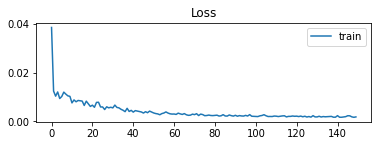

In [4]:
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
_, train_mse = regressor.evaluate(X_train, y_train, verbose=0)
_, test_mse = regressor.evaluate(X_train, y_train, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse, test_mse))
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(reg.history['loss'], label='train')
pyplot.legend()
# plot mse during training

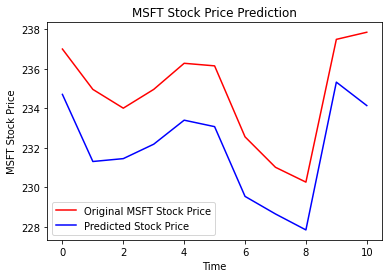

In [5]:
dataset_test = pd.read_csv('../data/microsoft_stock_test_dataset.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 14:].values
#10 previous trained days

inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range(15, 26):
    X_test.append(inputs[i-15:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Predict the Stock Price
predicted_stock_price = regressor.predict(X_test)

predicted_stock_price = sc.inverse_transform(predicted_stock_price)
#for dollar price ^


plt.plot(real_stock_price, color = 'red', label = 'Original MSFT Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('MSFT Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('MSFT Stock Price')
plt.legend()
plt.show()


Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


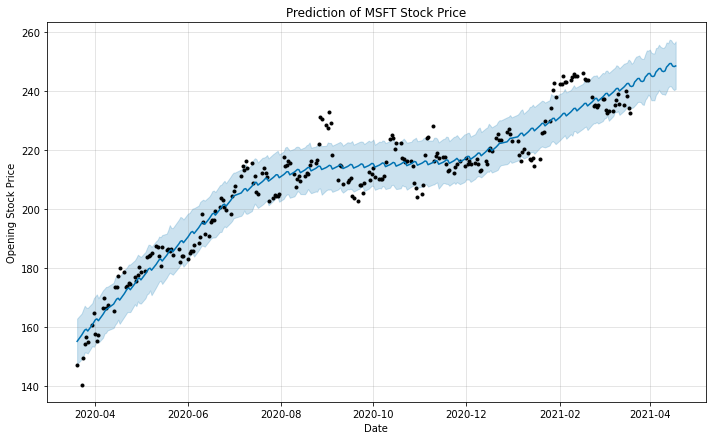

In [6]:
from fbprophet import Prophet
from datetime import datetime
m = Prophet(daily_seasonality=True)
df = pd.read_csv('../data/microsoft_historical_finance_data_train.csv')

df = df.rename(columns = {"Date":"ds","High":"y"})
m.fit(df)  # df is a pandas.DataFrame with 'y' and 'ds' columns
future = m.make_future_dataframe(periods=30,include_history=True)
forecast = m.predict(future)
#print(forecast)
m.plot(forecast)
plt.title("Prediction of MSFT Stock Price")
plt.xlabel("Date")
plt.ylabel("Opening Stock Price")
plt.show()


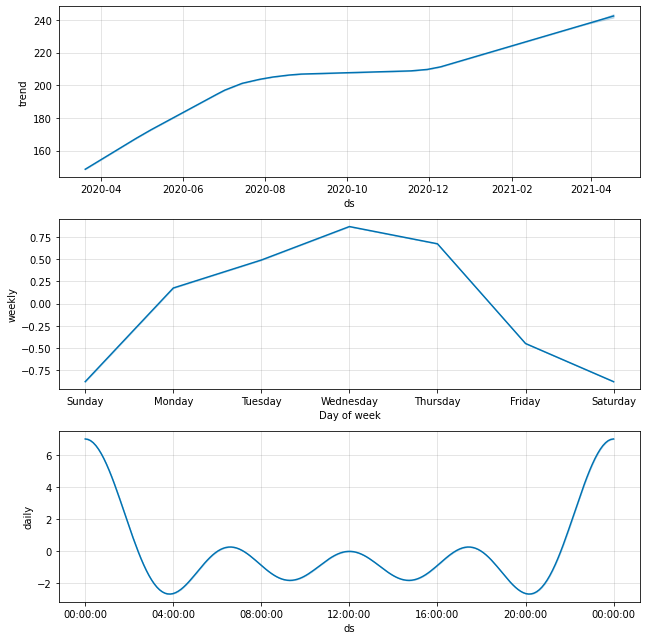

In [7]:
m.plot_components(forecast)
plt.show()

In [8]:
#print(forecast['trend'].tail(30).head(10))

In [9]:
dataset_test2 = pd.read_csv('../data/microsoft_stock_test_dataset.csv')

In [10]:
#dataset_test2['Open']

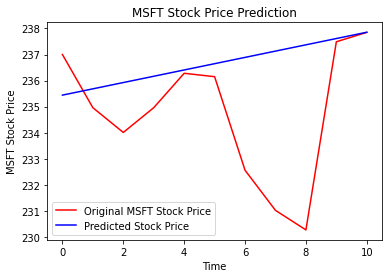

In [11]:
plt.plot(dataset_test2['Open'].values, color = 'red', label = 'Original MSFT Stock Price')
plt.plot(forecast['trend'].tail(30).head(11).values, color = 'blue', label = 'Predicted Stock Price')
plt.title('MSFT Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('MSFT Stock Price')
plt.legend()
plt.show()

In [12]:
import random
import numpy as np
from copy import deepcopy
from sklearn.linear_model import LinearRegression

class EVOLUTIONARY_ANFIS:
    def __init__(self,functions,generations,offsprings,mutationRate,learningRate,chance,ruleComb):
        self.functions = functions
        self.generations = generations
        self.offsprings = offsprings
        self.mutationRate = mutationRate
        self.learningRate = learningRate
        self.chance = chance #50 percent chance of changing std.
        self.ruleComb = ruleComb
        self._noParam = 2

    def gaussian(self,x, mu, sig):
        return np.exp((-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))))
    
    def initialize(self,X):
        functions = self.functions
        noParam = self._noParam
        ruleComb = self.ruleComb
        inputs = np.zeros((X.shape[1],X.shape[0],functions))
        Ant = np.zeros((noParam,X.shape[1],X.shape[0],functions))
        L1 = np.zeros((X.shape[1],X.shape[0],functions))
        if ruleComb == "simple":
            L2 = np.zeros((X.shape[0],functions)) 
        elif ruleComb == "complete":
            rules = X.shape[1]**functions
            L2 = np.zeros((X.shape[0],rules))   
        return inputs, Ant, L1, L2
    
    def mutation(self,arr):
        mutationRate = self.mutationRate
        learningRate = self.learningRate
        chance = self.chance
        temp = np.asarray(arr)   # Cast to numpy array
        mean = temp[0]
        meanShape = mean.shape
        std = temp[1]
        stdShape = std.shape
        mean = mean.flatten()    # Flatten to 1D
        std = std.flatten()    # Flatten to 1D
        num = int(mutationRate*mean.size) # number of elements to get
        if random.uniform(0,1)>chance:
            inds = np.random.choice(mean.size, size=num)   # Get random indices
            mean[inds] -= np.random.uniform(0,1,size=num)*learningRate        # Fill with something
            mean = mean.reshape(meanShape)                     # Restore original shape
            std = std.reshape(stdShape)
        else:
            inds = np.random.choice(std.size, size=num)   # Get random indices
            std[inds] -= np.random.uniform(0,1,size=num)*learningRate        # Fill with something
            std = std.reshape(stdShape)                     # Restore original shape    
            std = np.where(std==0, 0.0001, std) #standard deviation cannot be zero
            #temp = np.where(temp<=0, 0.0001, temp)
            #temp = np.where(temp>=1, 0.9999, temp)
            
            mean = mean.reshape(meanShape)
        temp[0] = mean
        temp[1] = std
        return temp
    
    def init_population(self,X):
        noParam = self._noParam
        functions = self.functions
        offsprings = self.offsprings
        bestParam = np.random.rand(noParam,X.shape[1],functions)
        parentParam = deepcopy(bestParam)
        popParam = []
        for i in range(offsprings):
            popParam.append(self.mutation(parentParam))
        return popParam
    
    def init_model(self,model=LinearRegression()):
        models = []
        for i in range(self.functions):
                models.append(model)
        return models

    def forwardPass(self,param,X,inputs,Ant,L1,L2,functions):
        noParam = self._noParam
        
        for i in range(X.shape[1]):   #input variables     
            inputs[i] = np.repeat(X[:,i].reshape(-1,1),functions,axis=1)

        for ii in range(noParam):   #Anticedent parameters
            for i in range(X.shape[1]):
                Ant[ii] = np.repeat(param[ii][i,:].reshape(1,-1),X.shape[0],axis=0)
        
        for i in range(X.shape[1]):  #Membership values using Gaussian membership function      
            L1[i,:,:] = self.gaussian(x=inputs[i],mu=Ant[0][i],sig=Ant[1][i])
      
        for j in range(functions):      #rule
            for i in range(1,X.shape[1]):
                L2[:,j] = (L1[i-1,:,j]*L1[i,:,j])#+(L1[i-1,:,j]+L1[i,:,j])
    
        summ = np.sum(L2,axis=1).reshape(-1,1) #Weights normalization
        summation = np.repeat(summ,functions,axis=1)
        L3 = L2/summation
        L3 = np.round(L3,5)
        #Errorcheck = np.sum(L3,axis=1)
    
        consequent = X
        L4 = np.zeros((functions,X.shape[0],X.shape[1]))
        for i in range (functions):
            L4[i] = consequent
            L4[i] = L4[i]*L3[:,i].reshape(-1,1)
        return L1,L2,L3,L4
    
    def linear_fit(self,L3,L4,X,y,functions,models):
        pred_train = np.zeros((X.shape[0],functions))
        for i in range(functions):
            models[i].fit(L4[i],y)
            predTemp = models[i].predict(L4[i])
            pred_train[:,i] = predTemp[:,0]       
        pred_train = pred_train*L3 #consequent function output * normalized weights
        pred_train = np.sum(pred_train,axis=1)
        return pred_train, models 

    def linear_predict(self,L3,L4,X,functions,Trained_models):
        pred_test = np.zeros((X.shape[0],functions))
        for i in range(functions):            
            predTemp = Trained_models[i].predict(L4[i]).reshape(-1,1)               
            pred_test[:,i] = predTemp[:,0]
        pred_test = pred_test*L3 #consequent function output * normalized weights
        pred_test = np.sum(pred_test,axis=1)
        return pred_test

    @staticmethod
    def rmse(true, pred): 
      loss = np.sqrt(np.mean((true - pred)**2))
      return loss

    def fit(self,X_train,y_train,X_test=None,y_test=None,optimize_test_data=False):
        generations = self.generations
        offsprings = self.offsprings
        functions = self.functions
        popParam = self.init_population(X_train)
        inputsTrain,AntTrain,L1Train,L2Train = self.initialize(X_train)
        if optimize_test_data:
            inputsTest,AntTest,L1Test,L2Test = self.initialize(X_test)
        models = self.init_model()
        bestParam = popParam[0]
        for gen in range(generations):
            parentParam = deepcopy(bestParam)
            popParam[0] = deepcopy(bestParam)
            for ii in range(1,offsprings):
                mut = self.mutation(parentParam)        
                popParam[ii] = deepcopy(mut)
                    
            PopulationError = []
            bestModelLst = []
            for i in range(len(popParam)):
                L1,L2,L3,L4 = self.forwardPass(popParam[i],X_train,inputsTrain,AntTrain,L1Train,L2Train,functions)
                pred_train, Trained_models = self.linear_fit(L3,L4,X_train,y_train,functions,models)
                mse_train = self.rmse(y_train,pred_train)

                if optimize_test_data:
                    L1,L2,L3,L4 = self.forwardPass(popParam[i],X_test,inputsTest,AntTest,L1Test,L2Test,functions)
                    pred_test = self.linear_predict(L3,L4,X_test,functions,Trained_models)
                    mse_test = self.rmse(y_test,pred_test)
                    
                    PopulationError.append((mse_train+mse_test)/2)
                    bestModelLst.append(Trained_models)
                else:
                    PopulationError.append(mse_train)
                    bestModelLst.append(Trained_models)

            bestParamIndex = np.argmin(PopulationError)
            bestParam = deepcopy(popParam[bestParamIndex])
            bestModel = bestModelLst[bestParamIndex]
            print(gen,"RMSE is: ",PopulationError[bestParamIndex])   
        return bestParam, bestModel

    def predict(self,X,bestParam,bestModel):
        functions = self.functions
        inputs,Ant,L1,L2 = self.initialize(X)
        L1,L2,L3,L4 = self.forwardPass(bestParam,X,inputs,Ant,L1,L2,functions)
        pred = self.linear_predict(L3,L4,X,functions,bestModel)
        return pred

[[0.74291795 0.75149061]
 [0.69783375 0.73910651]
 [0.66969088 0.6538849 ]
 [0.44038146 0.485827  ]
 [0.51953349 0.46133386]
 [0.38927978 0.43280437]
 [0.88455841 0.86909455]
 [0.70949821 0.68892762]
 [0.75523049 0.75782032]
 [0.43658583 0.43684071]
 [0.63988157 0.66388408]
 [0.67635632 0.70498119]
 [0.36678401 0.35849921]
 [0.34697286 0.39317491]
 [0.79707464 0.78011193]
 [0.76967225 0.76763601]
 [0.0623959  0.11338408]
 [0.71292359 0.73718001]
 [0.72107014 0.70599027]
 [0.78142936 0.79598199]
 [0.68144785 0.63361161]
 [0.44251066 0.45573804]
 [0.63312346 0.62324554]
 [0.64330682 0.61168702]
 [0.75606365 0.76726899]
 [0.20727641 0.19933959]
 [0.71042402 0.73809742]
 [0.54406593 0.57297496]
 [0.47204224 0.4937162 ]
 [0.39335311 0.39097336]
 [0.71310864 0.75506825]
 [0.66108128 0.66782861]
 [0.59239032 0.62306203]
 [0.61599709 0.65902215]
 [0.16746908 0.16374649]
 [0.4172376  0.42711672]
 [0.86391412 0.89248693]
 [0.70440667 0.7175488 ]
 [0.88085545 0.84010636]
 [0.42158865 0.4015228 ]


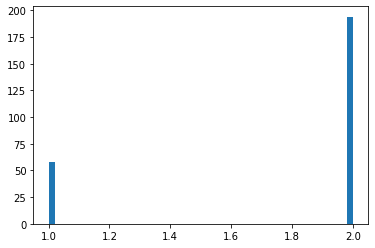

In [26]:
from sklearn.model_selection import train_test_split 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler


data = pd.read_csv('../data/microsoft_historical_finance_data_train.csv')
test = pd.read_csv('../data/microsoft_stock_test_dataset.csv')
#data = pd.read_excel('walkertrain.xlsx')
#test = pd.read_excel('walkertest.xlsx')

Data = data.loc[:,['Open','Close','High']]
test = test.loc[:,['Open','Close','High']]

#Data = data.loc[:,['FC','VM','Ash','Moisture','Cal V']]

# digitizing continuous variable
aa = Data['Open']
minima = aa.min()
maxima = aa.max()
bins = np.linspace(minima-1,maxima+1, 3)
binned = np.digitize(aa, bins)
plt.hist(binned, bins=50)
data_train, data_test = train_test_split(Data, test_size=0.2,
                                          random_state=101,stratify=binned)

X_train = data_train.drop("High",axis=1).values
y_train = data_train["High"].copy().values
X_test = data_test.drop("High",axis=1).values
y_test = data_test["High"].copy().values
X_val = test.drop("High",axis=1).values
y_val = test["High"].copy().values

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test = scaler_x.transform(X_test)
#X_val = scaler_x.transform(X_val)
scaler_y.fit(y_train.reshape(-1,1))
y_train = scaler_y.transform(y_train.reshape(-1,1))
y_test = scaler_y.transform(y_test.reshape(-1,1))
#y_val = scaler_y.transform(y_val.reshape(-1,1))

print(X_train)
print(y_train)



In [27]:
#from ANFIS import EVOLUTIONARY_ANFIS

E_Anfis = EVOLUTIONARY_ANFIS(functions=3,generations=500,offsprings=10,
                             mutationRate=0.2,learningRate=0.2,chance=0.7,ruleComb="simple")

bestParam, bestModel = E_Anfis.fit(X_train,y_train,optimize_test_data=False)

bestParam, bestModel = E_Anfis.fit(X_train,y_train,X_test,y_test,optimize_test_data=True)


0 RMSE is:  0.28118969686917383
1 RMSE is:  0.2571064449494176
2 RMSE is:  0.2562780003816529
3 RMSE is:  0.2562780003816529
4 RMSE is:  0.2525809647140766
5 RMSE is:  0.2525809647140766
6 RMSE is:  0.2525809647140766
7 RMSE is:  0.2525809647140766
8 RMSE is:  0.25162202696668157
9 RMSE is:  0.25099043004944116
10 RMSE is:  0.24860862312331394
11 RMSE is:  0.24860862312331394
12 RMSE is:  0.24650171819666047
13 RMSE is:  0.24650171819666047
14 RMSE is:  0.24650171819666047
15 RMSE is:  0.24650171819666047
16 RMSE is:  0.24121409522415188
17 RMSE is:  0.24121409522415188
18 RMSE is:  0.24121409522415188
19 RMSE is:  0.24015110373029935
20 RMSE is:  0.24015110373029935
21 RMSE is:  0.24015110373029935
22 RMSE is:  0.23917019630653344
23 RMSE is:  0.23917019630653344
24 RMSE is:  0.23917019630653344
25 RMSE is:  0.2390192888697962
26 RMSE is:  0.2390192888697962
27 RMSE is:  0.2390192888697962
28 RMSE is:  0.2390192888697962
29 RMSE is:  0.2390192888697962
30 RMSE is:  0.23617593313006546

249 RMSE is:  0.23050992976413442
250 RMSE is:  0.23050992976413442
251 RMSE is:  0.23050992976413442
252 RMSE is:  0.23050992976413442
253 RMSE is:  0.23050992976413442
254 RMSE is:  0.23050992976413442
255 RMSE is:  0.23050992976413442
256 RMSE is:  0.23050992976413442
257 RMSE is:  0.23050992976413442
258 RMSE is:  0.23050992976413442
259 RMSE is:  0.23050992976413442
260 RMSE is:  0.23050992976413442
261 RMSE is:  0.23050992976413442
262 RMSE is:  0.23050992976413442
263 RMSE is:  0.23050992976413442
264 RMSE is:  0.23050992976413442
265 RMSE is:  0.23050992976413442
266 RMSE is:  0.23050992976413442
267 RMSE is:  0.23050992976413442
268 RMSE is:  0.23050992976413442
269 RMSE is:  0.23050992976413442
270 RMSE is:  0.23050992976413442
271 RMSE is:  0.23050992976413442
272 RMSE is:  0.23050992976413442
273 RMSE is:  0.23050992976413442
274 RMSE is:  0.23050992976413442
275 RMSE is:  0.23050992976413442
276 RMSE is:  0.23050992976413442
277 RMSE is:  0.23050992976413442
278 RMSE is:  

498 RMSE is:  0.23050561330395705
499 RMSE is:  0.23050561330395705
0 RMSE is:  0.386061501297763
1 RMSE is:  0.386061501297763
2 RMSE is:  0.386061501297763
3 RMSE is:  0.386061501297763
4 RMSE is:  0.386061501297763
5 RMSE is:  0.386061501297763
6 RMSE is:  0.30407904313708545
7 RMSE is:  0.30407904313708545
8 RMSE is:  0.2244723776592418
9 RMSE is:  0.2244723776592418
10 RMSE is:  0.2244723776592418
11 RMSE is:  0.2244723776592418
12 RMSE is:  0.2243809149956678
13 RMSE is:  0.21929748833679086
14 RMSE is:  0.21929748833679086
15 RMSE is:  0.21929748833679086
16 RMSE is:  0.21929748833679086
17 RMSE is:  0.21929748833679086
18 RMSE is:  0.21929748833679086
19 RMSE is:  0.21929748833679086
20 RMSE is:  0.21929748833679086
21 RMSE is:  0.21929748833679086
22 RMSE is:  0.21860039389290103
23 RMSE is:  0.21860039389290103
24 RMSE is:  0.21860039389290103
25 RMSE is:  0.21860039389290103
26 RMSE is:  0.21860039389290103
27 RMSE is:  0.21860039389290103
28 RMSE is:  0.21752303488651922
29

250 RMSE is:  0.2175175238924697
251 RMSE is:  0.2175175238924697
252 RMSE is:  0.2175175238924697
253 RMSE is:  0.2175175238924697
254 RMSE is:  0.2175175238924697
255 RMSE is:  0.2175175238924697
256 RMSE is:  0.2175175238924697
257 RMSE is:  0.2175175238924697
258 RMSE is:  0.2175175238924697
259 RMSE is:  0.2175175238924697
260 RMSE is:  0.2175175238924697
261 RMSE is:  0.2175175238924697
262 RMSE is:  0.2175175238924697
263 RMSE is:  0.2175175238924697
264 RMSE is:  0.2175175238924697
265 RMSE is:  0.2175175238924697
266 RMSE is:  0.2175175238924697
267 RMSE is:  0.2175175238924697
268 RMSE is:  0.2175175238924697
269 RMSE is:  0.2175175238924697
270 RMSE is:  0.2175175238924697
271 RMSE is:  0.2175175238924697
272 RMSE is:  0.2175175238924697
273 RMSE is:  0.2175175238924697
274 RMSE is:  0.2175175238924697
275 RMSE is:  0.2175175238924697
276 RMSE is:  0.2175175238924697
277 RMSE is:  0.2175175238924697
278 RMSE is:  0.2175175238924697
279 RMSE is:  0.2175175238924697
280 RMSE i

[[104.00369435]
 [179.58080878]
 [105.61337037]
 [124.42058244]
 [193.22898414]
 [135.57195688]
 [127.51096785]
 [ 92.38554519]
 [115.79634096]
 [102.71261288]
 [116.00258178]
 [ 95.39962945]
 [142.81375741]
 [110.54985423]
 [ 98.34494343]
 [-40.40330737]
 [114.322356  ]
 [151.77722837]
 [133.62955866]
 [ 84.1285854 ]
 [108.6795693 ]
 [131.49609459]
 [-36.63013058]
 [ 99.00679883]
 [105.12965471]
 [112.06091018]
 [-45.09218486]
 [ 84.38913168]
 [102.15012844]
 [111.32825774]
 [100.34653229]
 [102.46218914]
 [109.76775957]
 [ 81.38640914]
 [179.81142605]
 [109.82241035]
 [102.28607063]
 [132.52025925]
 [105.26945773]
 [102.05209326]
 [136.37677048]
 [107.90800587]
 [ 80.05370234]
 [ 84.03348322]
 [122.88007954]
 [109.81211622]
 [113.29230527]
 [ 95.72056056]
 [109.34665471]
 [ 94.43610722]
 [109.2454849 ]]


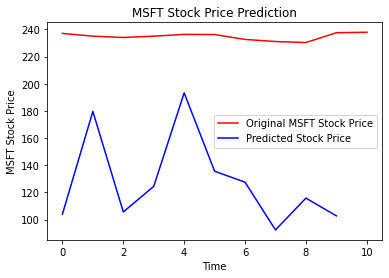

In [28]:
pred_test = E_Anfis.predict(X_test,bestParam,bestModel)
#print(pred_test)
pred_test = sc.inverse_transform(pred_test.reshape(-1,1))
print(pred_test)
# plot loss during training
#pyplot.subplot(211)
#pyplot.title('PRED')
#pyplot.plot(pred_test, label='ANFIS')
#pyplot.legend()


plt.plot(dataset_test2['Open'].values, color = 'red', label = 'Original MSFT Stock Price')
plt.plot(pred_test[0:10], color = 'blue', label = 'Predicted Stock Price')
plt.title('MSFT Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('MSFT Stock Price')
plt.legend()
plt.show()

In [32]:
from sklearn.datasets import make_classification
from sklearn import linear_model 
import sklearn.preprocessing as pre
from feature_selection_ga import FeatureSelectionGA, FitnessFunction
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

#X, y = make_classification(n_samples as pre=100, n_features=15, n_classes=3,
 #                          n_informative=4, n_redundant=1, n_repeated=2,
  #                         random_state=1)

#print(X)
#print(y)
df_t = pd.read_csv('../data/microsoft_historical_finance_data_train.csv')
del df_t['Date']
#del df_t['High']


#adding random column for noise detection
import numpy as np
df_t['Random'] = np.random.randint(1, 200, df_t.shape[0])
print(df_t.head(5))
#est = pre.KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
#est.fit(df_t)
# enc = LabelEncoder()
# df_t['Open'] = enc.fit_transform(df_t[['Open']])
# df_t['High'] = enc.fit_transform(df_t[['High']])
# df_t['Low'] = enc.fit_transform(df_t[['Low']])
# df_t['Close'] = enc.fit_transform(df_t[['Close']])
# df_t['Adj Close'] = enc.fit_transform(df_t[['Adj Close']])

df_t['Open'] = pd.cut(df_t.Open, bins=10, labels=np.arange(10), right=False)
df_t['High'] = pd.cut(df_t.High, bins=10, labels=np.arange(10), right=False)
df_t['Low'] = pd.cut(df_t.Low, bins=10, labels=np.arange(10), right=False)
df_t['Close'] = pd.cut(df_t.Close, bins=10, labels=np.arange(10), right=False)
df_t['Adj Close'] = pd.cut(df_t['Adj Close'], bins=10, labels=np.arange(10), right=False)
df_t['Random'] = pd.cut(df_t['Random'], bins=10, labels=np.arange(10), right=False)


#print(df_t['Open'])

#print(df_t['Open'])
X = df_t.iloc[:, 1:].to_numpy()
# Get label (last column)
y = df_t.iloc[:, 0].to_numpy()
#y= enc_df

# for i in range(0, len(y)):
#     if y[i] <= 100:
#         y[i] = 0
#     elif y[i] > 100 and y[i] < 150:
#         y[i] = 3
#     elif 150 < y[i] < 200:
#         y[i] = 1
#     else:
#         y[i] = 2

    
#print(X)
#print(y)
model = RandomForestClassifier(n_estimators=50)
fsga = FeatureSelectionGA(model,X,y, ff_obj = FitnessFunction(n_splits = 3))
pop = fsga.generate(100)

#print(pop)

         Open         Low       Close   Adj Close    Volume        High  \
0  146.000000  135.860001  137.350006  135.968292  84866200  147.100006   
1  137.009995  132.520004  135.979996  134.612076  78975200  140.570007   
2  143.750000  141.270004  148.339996  146.847717  82516700  149.600006   
3  148.910004  144.440002  146.919998  145.442017  75638200  154.330002   
4  148.399994  148.369995  156.110001  154.539566  64568100  156.660004   

   Random  
0      67  
1      55  
2     169  
3      39  
4       8  
EVOLVING.......


c:\python38\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FeatureSelect' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\python38\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


-- GENERATION 1 --
Evaluated 62 individuals
-- GENERATION 2 --
Evaluated 61 individuals
-- GENERATION 3 --
Evaluated 61 individuals
-- GENERATION 4 --
Evaluated 53 individuals
-- GENERATION 5 --
Evaluated 64 individuals
-- Only the fittest survives --
Best individual is [0, 0, 0, 0, 1, 0], (0.8928571428571429,)
